In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [78]:
# define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    # calculate derivative of the Level
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

In [91]:
# time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

# valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(len(ts)) # u = valve % open

# level initial condition
Level0 = 0.0

# initial valve position
valve = 0.0

# for storing the results
z = np.zeros(len(ts))
es = np.zeros(len(ts))

# what is the value for ubias?
ubias = 0.0

# decide on a tuning value for Kc
Kc = 20.0

# record the desired level (set point)
SP = 10*np.ones(len(ts))



In [92]:
# simulate with ODEINT
for i in range(len(ts)-1):
    # calculate the error
    error = SP[i] - Level0

    # P-only controller here
    valve = ubias + Kc*error

    # clipping the output to reduce valve open percentage (keep within 100%) 
    valve = min(100.0,max(0.0,valve))
    
    u[i+1] = valve   # store the valve position
    es[i+1] = error  # store the error 
    y = odeint(tank,Level0,[ts[i],ts[i+1]],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting

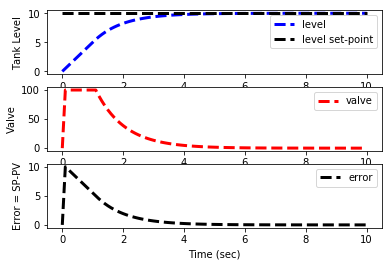

In [93]:
# plot results
plt.figure()
plt.subplot(3,1,1)
plt.plot(ts,z,'b--',linewidth=3,label='level')
plt.plot(ts,SP,'k--',linewidth=3,label='level set-point')
plt.ylabel('Tank Level')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(ts,u,'r--',linewidth=3,label='valve')
plt.ylabel('Valve')    
plt.legend(loc='best')

plt.subplot(3,1,3)
plt.plot(ts,es,'k--',linewidth=3,label='error')
plt.ylabel('Error = SP-PV')    
plt.xlabel('Time (sec)')
plt.legend(loc='best')
plt.show()